<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data
===

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd "drive/My Drive/Colab Notebooks/DS"
cd "Project/Data"

/content/drive/My Drive/Colab Notebooks/DS


In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
file_list = os.listdir()
data_tmp = []
for file in file_list:
  df = pd.read_csv(file)
  data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)
assert len(final_df) == 79500

In [33]:
final_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Rick and Morty,23,An animated series that follows the exploi...,2013,"Animation, Adventure, Comedy","Justin Roiland, Chris Parnell, Spencer Grammer...",NaN,308799,NaN,9.3
1,Frozen,102,When the newly crowned Queen Elsa accident...,2013,"Animation, Adventure, Comedy","Kristen Bell, Idina Menzel, Jonathan Groff, Jo...","Directors:Chris Buck, Jennifer Lee",537789,$400.74M,7.5
2,BoJack Horseman,25,BoJack Horseman was the star of the hit te...,2014,"Animation, Comedy, Drama","Will Arnett, Amy Sedaris, Alison Brie, Aaron Paul",NaN,80475,NaN,8.6
3,Star Wars Rebels,22,A brave and clever ragtag starship crew st...,2018,"Animation, Action, Adventure","Taylor Gray, Dave Filoni, Vanessa Marshall, Fr...",NaN,23428,NaN,8.0
4,Big Mouth,30,Teenage friends find their lives upended b...,2017,"Animation, Comedy, Romance","Nick Kroll, John Mulaney, Jessi Klein, Jenny S...",NaN,44590,NaN,8.0


In [0]:
df = final_df.copy()

In [0]:
df = df.dropna(axis=0)
df = df.drop_duplicates()

In [40]:
df

,title,runtime,des,date,genre,cast,director,vote,gross,rating
1,Frozen,102,When the newly crowned Queen Elsa accident...,2013,"Animation, Adventure, Comedy","Kristen Bell, Idina Menzel, Jonathan Groff, Jo...","Directors:Chris Buck, Jennifer Lee",537789,$400.74M,7.5
9,Arthur Christmas,97,Santa's clumsy son Arthur sets out on a mi...,2011,"Animation, Adventure, Comedy","James McAvoy, Jim Broadbent, Bill Nighy, Hugh ...","Directors:Sarah Smith, Barry Cook",47318,$46.46M,7.1
10,Moana,107,"In Ancient Polynesia, when a terrible curs...",2016,"Animation, Adventure, Comedy","Auli'i Cravalho, Dwayne Johnson, Rachel House,...","Directors:Ron Clements, John Musker, Don Hall,...",238772,$248.76M,7.6
12,Zootopia,108,"In a city of anthropomorphic animals, a ro...",2016,"Animation, Adventure, Comedy","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...","Directors:Byron Howard, Rich Moore, Jared Bush",398939,$341.27M,8.0
14,Coco,105,"Aspiring musician Miguel, confronted with ...",2017,"Animation, Adventure, Family","Anthony Gonzalez, Gael García Bernal, Benjamin...","Directors:Lee Unkrich, Adrian Molina",311127,$209.73M,8.4
...,...,...,...,...,...,...,...,...,...,...
73381,Love Me True,88,Eric feels his life falling apart -- until...,2015,"Comedy, Drama, Romance","Andrew Gude, William McGovern, Kaleigh Macchio...",Kirby Voss,30,$0.02M,5.2
73664,Downtown Express,90,Sasha is a young Russian violinist on a sc...,2011,"Drama, Music, Romance","Philippe Quint, Nellie McKay, Michael Cumpsty,...",David Grubin,24,$0.00M,8.1
73826,A Troubled Mind,120,This is a tragic and suspense movie...the ...,2015,"Action, Drama, Mystery","A. Michelle Harleston, Ronrico Albright, Rober...",Robert L. Parker III,23,$0.01M,5.0
73924,True Love Zombie,86,Rhonda and Paul are a loving married coupl...,2012,"Comedy, Horror, Romance","Paul Blevins, Rhonda Blevins, Steve Snyder, Je...",Paul Blevins,29,$0.00M,4.2


In [0]:
df.to_csv("final_data.csv", index=False)

In [0]:
def build_word_index(df):
  pass

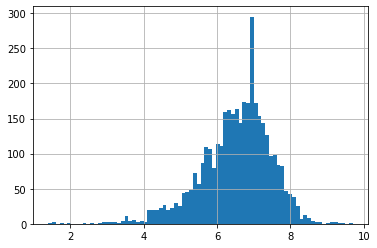

In [100]:
df.rating.hist(bins=80)

Feature Engineering
===

##We want to know if a genre is related to the rating.


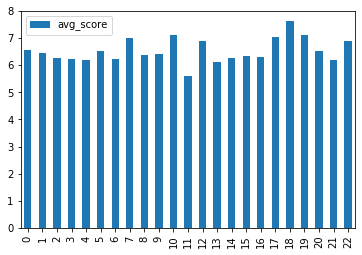

In [87]:
genre_rating_df = df[["genre",'rating']]

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
  unique_gen += g.strip().split(", ")
unique_gen = np.unique(unique_gen)
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df.plot.bar()

At the glimpse of the chart, the average rating of each genre is not much different which is ranging from 6~8. So we can conclude that genres do not affect much to the score.

##The next things: casts


2687


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


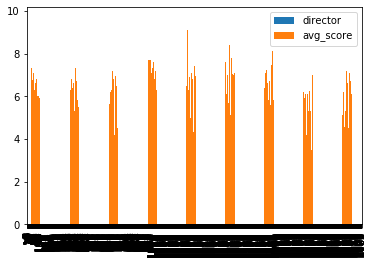

In [94]:
cast_rating_df = df[["director",'rating']]

list_cast = list(cast_rating_df.director)
unique_cast = []
for g in list_cast:
  unique_cast += g.strip().split(", ")
unique_cast = np.unique(unique_cast)
print(len(unique_cast))
hist = {}
for i in range(cast_rating_df.shape[0]):
  casts = cast_rating_df.iloc[i].director.strip().split(", ")
  rating  = cast_rating_df.iloc[i].rating
  for g in casts:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["director","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df.plot.bar()

Prediction
===